# Multi-class prediction problem
>>## Problem Statement
1) Build and submit a deep learning based Image classification model on 100 scrapped Images (for each category) from amazon for the below categories :                          
>> 1) Sarees  (women) (100 images)                        
>> 2) Tshirts (men) (100 images)                   
>> 3) Shirts (men) (100 images)  

>>## Features:
>> Used all the following optimisers:             
   >>1) SGD + Momentum                      
   >>2) Nesterov Accelerated Gradient Descent                                       
   >>3) RMSprop                 
   >>4) Adam              
   >>5) Nadam   
>> Trained the model for different learning rates and different callbacks and thgen displaying the result.

>>## Data:
>>1) Data is scrapped from amazon website for the above defined categories.               
>>2) It is also available at: https://github.com/ShubhSaini/Deep_Learning/tree/master/Assignment_2_Amazon_images/Dataset

## Importing Libraries

In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

import os
from os import listdir
import cv2
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

# Loading Directories

In [2]:
# Loading Train directory
train_data_dir='./Garments/train'

# Loading Test Directory
validation_data_dir='./Garments/test'


# Loading Some Scrapped Image Samples

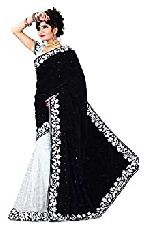

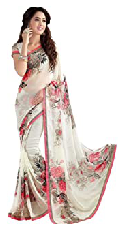

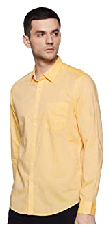

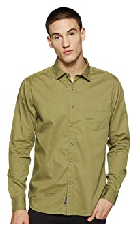

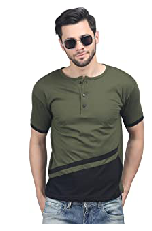

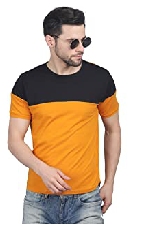

In [3]:
# Sample images which I have scrapped from amazon
import matplotlib.image as mpimg
Saree_train='./Garments/train/Saree'
Shirt_train='./Garments/train/Shirt'
Tshirt_train='./Garments/train/Tshirt'

Dir_train=[Saree_train, Shirt_train, Tshirt_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# Data Augmentation

In [4]:
# Performing Data Augmentation using OpenCV on the scrapped images

for dirs in Dir_train:
    
    if dirs==Saree_train:
        print("\nPerforming Augmentation operations on Saree images\n")
    elif dirs==Tshirt_train:
        print("\nPerforming Augmentation operations on Tshirt images \n")
    elif dirs==Shirt_train:
        print("\nPerforming Augmentation operations on Shirt images\n")
        
    for i in listdir(dirs):
        print("Input Image is: ",i)
        input_image=cv2.imread('{}/{}'.format(dirs,i))
        input_image = cv2.resize(input_image, (320, 320), interpolation = cv2.INTER_AREA)
        print("Shape of the image is: ",input_image.shape)
        
        # Splitting up the filename
        fold=i.split('_')
        
        # Rotating images
        height,width=input_image.shape[:2]
        rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),30,.5)
        rotated_image=cv2.warpAffine(input_image,rotation_matrix,(width,height))
        
        # Deciding folder to save the image
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_Rot.jpg'.format(i),rotated_image)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_Rot.jpg'.format(i),rotated_image)
    
        # Horizontal Flipping of the images
        flip=cv2.flip(input_image,1)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_flip.jpg'.format(i),flip)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_flip.jpg'.format(i),flip)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_flip.jpg'.format(i),flip)
    
        # Brightness Increase
        m=np.ones(input_image.shape,dtype="uint8")*75
        Added=cv2.add(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_incr.jpg'.format(i),Added)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_incr.jpg'.format(i),Added)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_incr.jpg'.format(i),Added)
    
        # Brightness Decrease
        Subtract=cv2.subtract(input_image,m)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_decr.jpg'.format(i),Subtract)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_decr.jpg'.format(i),Subtract)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_decr.jpg'.format(i),Subtract)

        # Sharpening Images
        kernel_sharpening=np.array([[-1,-1,-1],
                                    [-1,10,-1],
                                    [-1,-1,-1]])
        sharpened=cv2.filter2D(input_image,-1,kernel_sharpening)
        if fold[0]=="Shirt":
            cv2.imwrite('./Garments/train/Shirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Shirt/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Saree":
            cv2.imwrite('./Garments/train/Saree/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Saree/{}_sharp.jpg'.format(i),sharpened)
        elif fold[0]=="Tshirt":
            cv2.imwrite('./Garments/train/Tshirt/{}_sharp.jpg'.format(i),sharpened)
            cv2.imwrite('./Garments/Aug_img/Tshirt/{}_sharp.jpg'.format(i),sharpened)
    


Performing Augmentation operations on Saree images

Input Image is:  Saree_img_10.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_11.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_110.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_111.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_112.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_113.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_114.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_115.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_116.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_117.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_118.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_119.jpeg
Shape of the image is:  (320, 320, 3)
Input Image is:  Saree_img_12.jpeg
Shape of the image is:  (3

# Displaying some Augmented Images

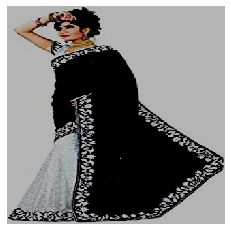

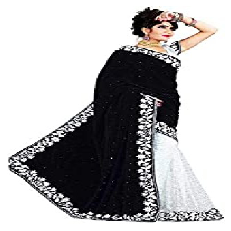

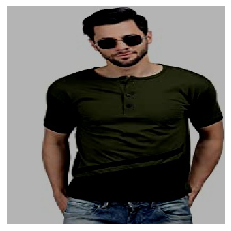

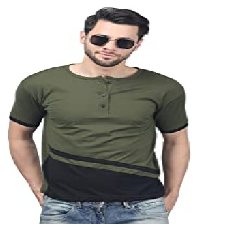

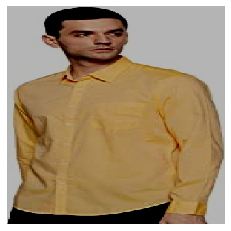

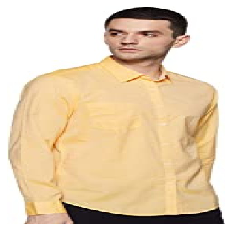

In [5]:
# Some Samples of Augmented Images
Saree_Aug='./Garments/Aug_img/Saree'
Tshirt_Aug='./Garments/Aug_img/Tshirt'
Shirt_Aug='./Garments/Aug_img/Shirt'

Dir_Aug=[Saree_Aug,Tshirt_Aug,Shirt_Aug]
for new_dir in Dir_Aug:
    k=listdir(new_dir)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(new_dir,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [6]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(150,150,3)
img_width=150
img_height=150
nb_train_samples=480
nb_validation_samples=20
batch_size=16
epoch=20



# Preparing Data for Training

In [7]:
# Validation
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=Data_gen.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 60 images belonging to 3 classes.
Found 1440 images belonging to 3 classes.


In [8]:
# As we can see that there are 3 classes for the 60 test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# checking class indices( 0,1,2 are assigned to Saree, Shirt, Tshirt by the machine automatically)
train_generator.class_indices

{'Saree': 0, 'Shirt': 1, 'Tshirt': 2}

#  Training our model (using SGD + Momentum) optimizer


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1288 - accuracy: 0.3313
Epoch 00001: val_loss improved from inf to 0.87700, saving model to ./sgd0.h5
30/30 [==============================] - 7s 238ms/step - loss: 1.1288 - accuracy: 0.3313 - val_loss: 0.8770 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1308 - accuracy: 0.3396
Epoch 00002: val_loss did not improve from 0.87700
30/30 [==============================] - 7s 240ms/step - loss: 1.1308 - accuracy: 0.3396 - val_loss: 1.3118 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1216 - accuracy: 0.3125
Epoch 00003: val_loss did not improve from 0.87700
30/30 [==============================] - 7s 228ms/step - loss: 1.1216 - accuracy: 0.3125 - val_loss: 1.3664 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 4/20
30/30 [====

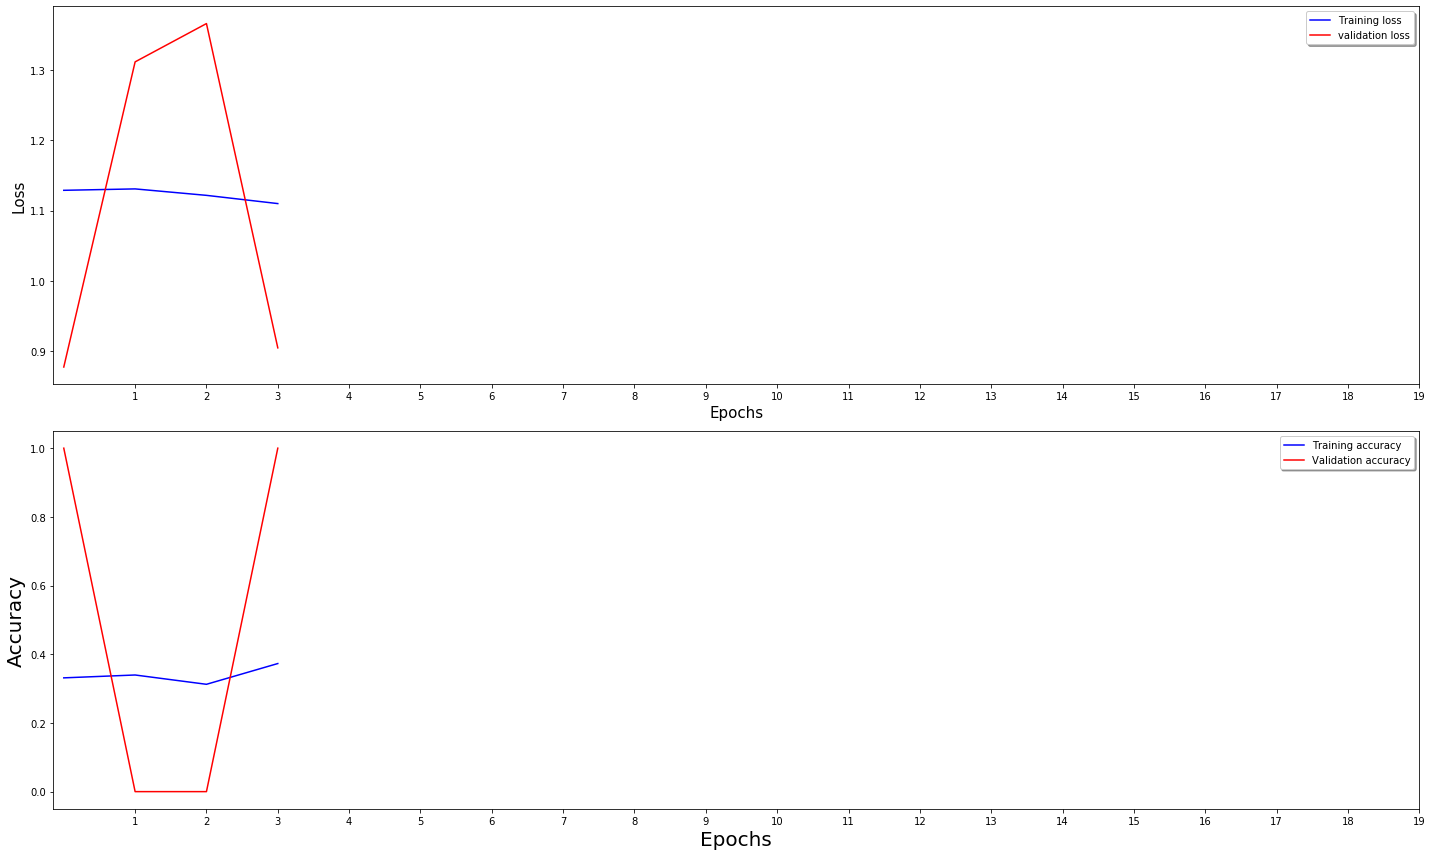

4/4 [==============================] - 0s 33ms/step - loss: 1.1134 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1269 - accuracy: 0.3521
Epoch 00001: val_loss improved from inf to 1.03720, saving model to ./sgd1.h5
30/30 [==============================] - 7s 240ms/step - loss: 1.1269 - accuracy: 0.3521 - val_loss: 1.0372 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0967 - accuracy: 0.3354
Epoch 00002: val_loss did not improve from 1.03720
30/30 [==============================] - 7s 237ms/step - loss: 1.0967 - accuracy: 0.3354 - val_loss: 1.0981 - val_accuracy: 0.3750 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0863 - accuracy: 0.3896
Epoch 00003: val_loss did not improve from 1.03720
30/30 [==============================] - 8s 250ms/step - loss: 1.086

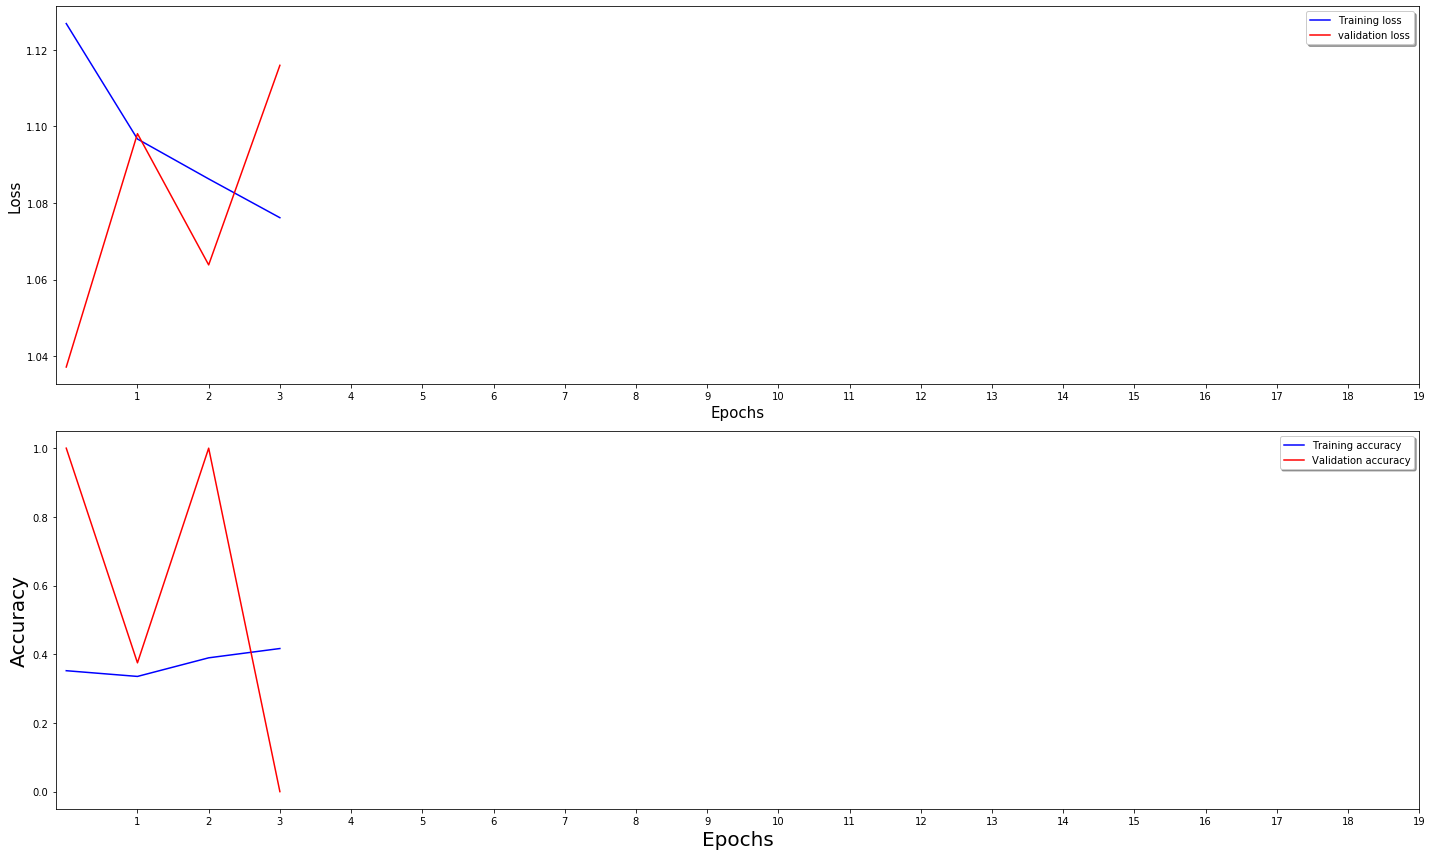

4/4 [==============================] - 0s 42ms/step - loss: 1.0898 - accuracy: 0.3500
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1151 - accuracy: 0.3667
Epoch 00001: val_loss improved from inf to 1.11617, saving model to ./sgd2.h5
30/30 [==============================] - 7s 248ms/step - loss: 1.1151 - accuracy: 0.3667 - val_loss: 1.1162 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0959 - accuracy: 0.3625
Epoch 00002: val_loss did not improve from 1.11617
30/30 [==============================] - 7s 238ms/step - loss: 1.0959 - accuracy: 0.3625 - val_loss: 1.3311 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0374 - accuracy: 0.4646
Epoch 00003: val_loss improved from 1.11617 to 1.07239, saving model to ./sgd2.h5
30/30 [======================

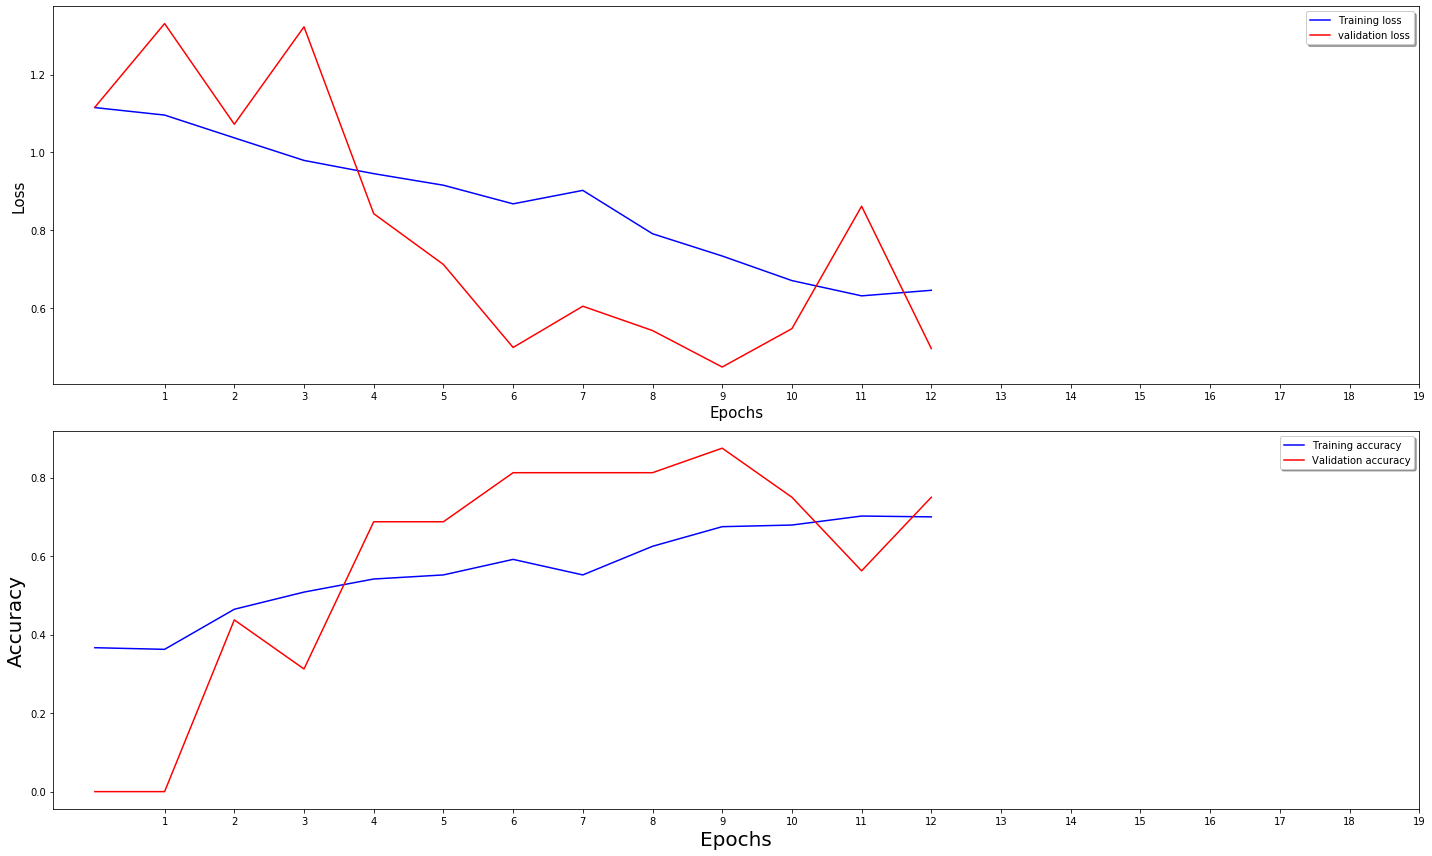

4/4 [==============================] - 0s 33ms/step - loss: 0.6633 - accuracy: 0.6667
***********************************************************************************************


In [10]:
learn_rate=[0.1,0.001,0.01]
evaluate_sgd=[]

for i,lr in enumerate(learn_rate):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9),
                  metrics=['accuracy'])

    ## EarlyStopping and ModelCheckpoint

    checkpoint = ModelCheckpoint("./sgd{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
    # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
    #Training the model
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    # Visualizing  Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1),)
    ax1.set_xlabel('Epochs' ,fontsize=15)
    ax1.set_ylabel('Loss' ,fontsize=15)
    ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xlabel('Epochs' ,fontsize=20)
    ax2.set_ylabel('Accuracy' ,fontsize=20)
    ax2.set_xticks(np.arange(1, epoch, 1))

    ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

    # Evaluating the model performance
    Eval_sgd=model.evaluate(validation_generator)
    evaluate_sgd.append(Eval_sgd)
    print("***********************************************************************************************")


In [11]:
# Displaying the value of Accuracy and Loss for different Learning Rate for (SGD+Momentum) optimizer.
df=pd.DataFrame({"Loss & Accuracy":evaluate_sgd,"learning rate":learn_rate})
df

,Loss & Accuracy,learning rate
0,"[1.1133685111999512, 0.3333333432674408]",0.100
1,"[1.0898171663284302, 0.3499999940395355]",0.001
2,"[0.6633028388023376, 0.6666666865348816]",0.010


In [15]:
# Saving the best model which will be used in next step for prediction
saved_model1=load_model("sgd2.h5")
metric= pd.DataFrame(history.history)
metric

,loss,accuracy,val_loss,val_accuracy,lr
0,1.115148,0.366667,1.116172,0.0000,0.01
1,1.095897,0.362500,1.331074,0.0000,0.01
2,1.037366,0.464583,1.072387,0.4375,0.01
3,0.979355,0.508333,1.322701,0.3125,0.01
4,0.945369,0.541667,0.842529,0.6875,0.01
5,0.915615,0.552083,0.711945,0.6875,0.01
6,0.867746,0.591667,0.498551,0.8125,0.01
7,0.902358,0.552083,0.604599,0.8125,0.01
8,0.790921,0.625000,0.542138,0.8125,0.01
9,0.733657,0.675000,0.448345,0.8750,0.01


## Predicting the Images using best model saved for (SGD+Momentum) optimizer

In [16]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model1.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Saree")
        elif final==1:
            Predicted_class.append("Shirt")
        elif final==2:
            Predicted_class.append("Tshirt")
        
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res

,Predicted_Label,Actual_Label
0,Saree,Saree
1,Saree,Saree
2,Saree,Saree
3,Saree,Saree
4,Saree,Saree
5,Saree,Saree
6,Saree,Saree
7,Saree,Saree
8,Saree,Saree
9,Saree,Saree


## Confusion matrix Visualization for (SGD+Momentum) optimizer.

(3.0, 0.0)

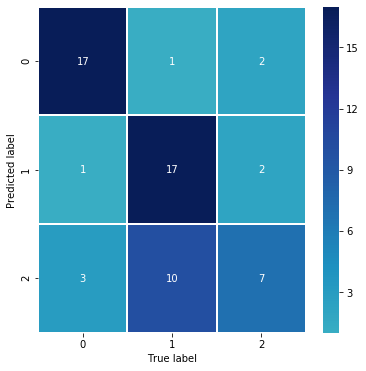

In [17]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Training our model using (SGD + Momentum+Nesterov Accelerated Gradient Descent) optimizer


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.3043 - accuracy: 0.3438
Epoch 00001: val_loss improved from inf to 1.08871, saving model to ./sgdnag0.h5
30/30 [==============================] - 7s 240ms/step - loss: 1.3043 - accuracy: 0.3438 - val_loss: 1.0887 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1280 - accuracy: 0.3458
Epoch 00002: val_loss improved from 1.08871 to 0.93700, saving model to ./sgdnag0.h5
30/30 [==============================] - 7s 235ms/step - loss: 1.1280 - accuracy: 0.3458 - val_loss: 0.9370 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1234 - accuracy: 0.3063
Epoch 00003: val_loss did not improve from 0.93700
30/30 [==============================] - 7s 238ms/step - loss: 1.1234 - accuracy: 0.3063 - val_loss: 1.1553 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 

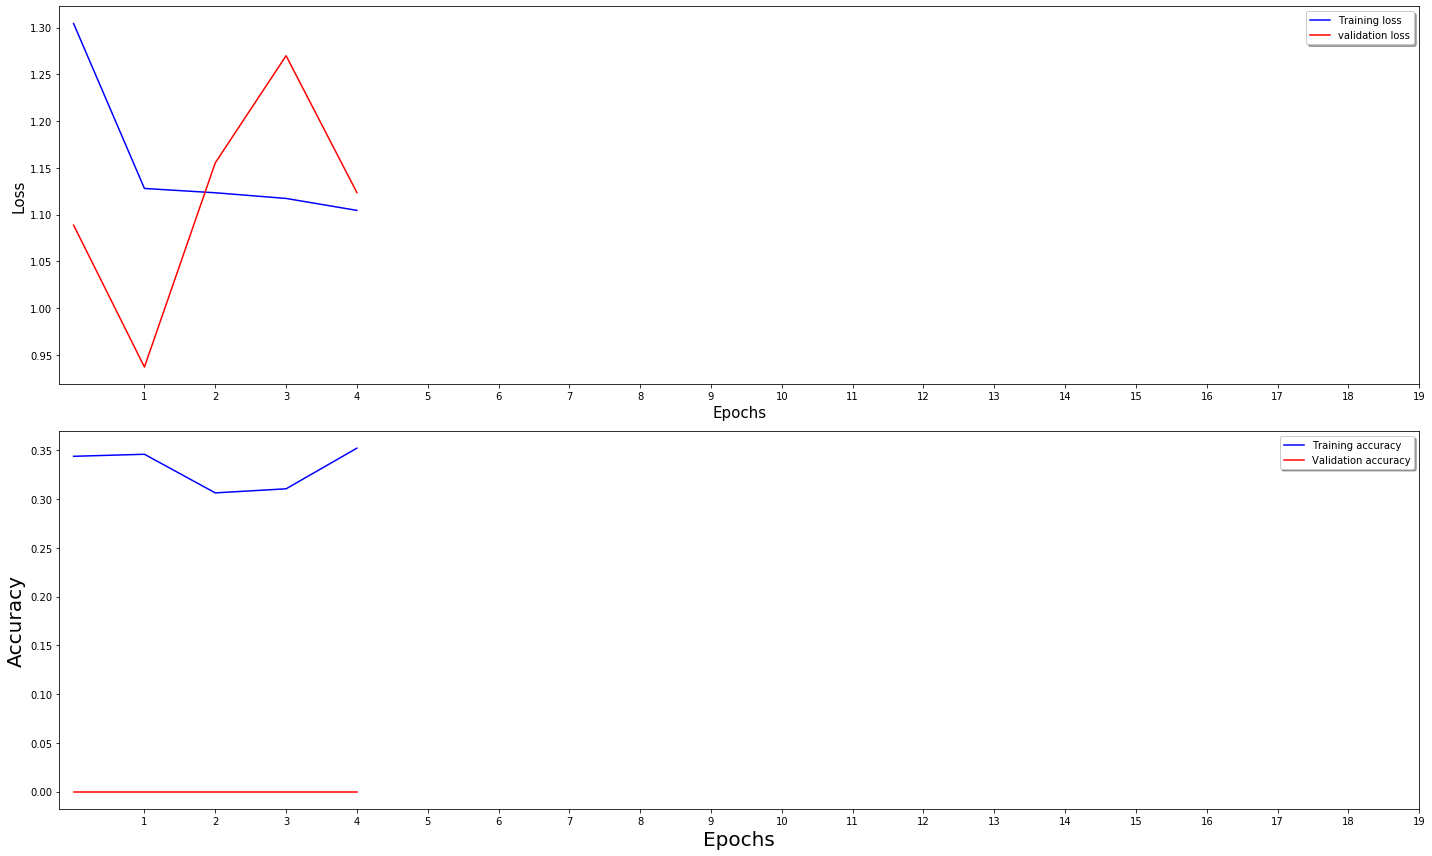

4/4 [==============================] - 0s 31ms/step - loss: 1.1496 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1373 - accuracy: 0.3500
Epoch 00001: val_loss improved from inf to 1.11574, saving model to ./sgdnag1.h5
30/30 [==============================] - 8s 252ms/step - loss: 1.1373 - accuracy: 0.3500 - val_loss: 1.1157 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0909 - accuracy: 0.3750
Epoch 00002: val_loss improved from 1.11574 to 1.06838, saving model to ./sgdnag1.h5
30/30 [==============================] - 7s 238ms/step - loss: 1.0909 - accuracy: 0.3750 - val_loss: 1.0684 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0840 - accuracy: 0.4187
Epoch 00003: val_loss did not improve from 1.06838
30/30 [====================

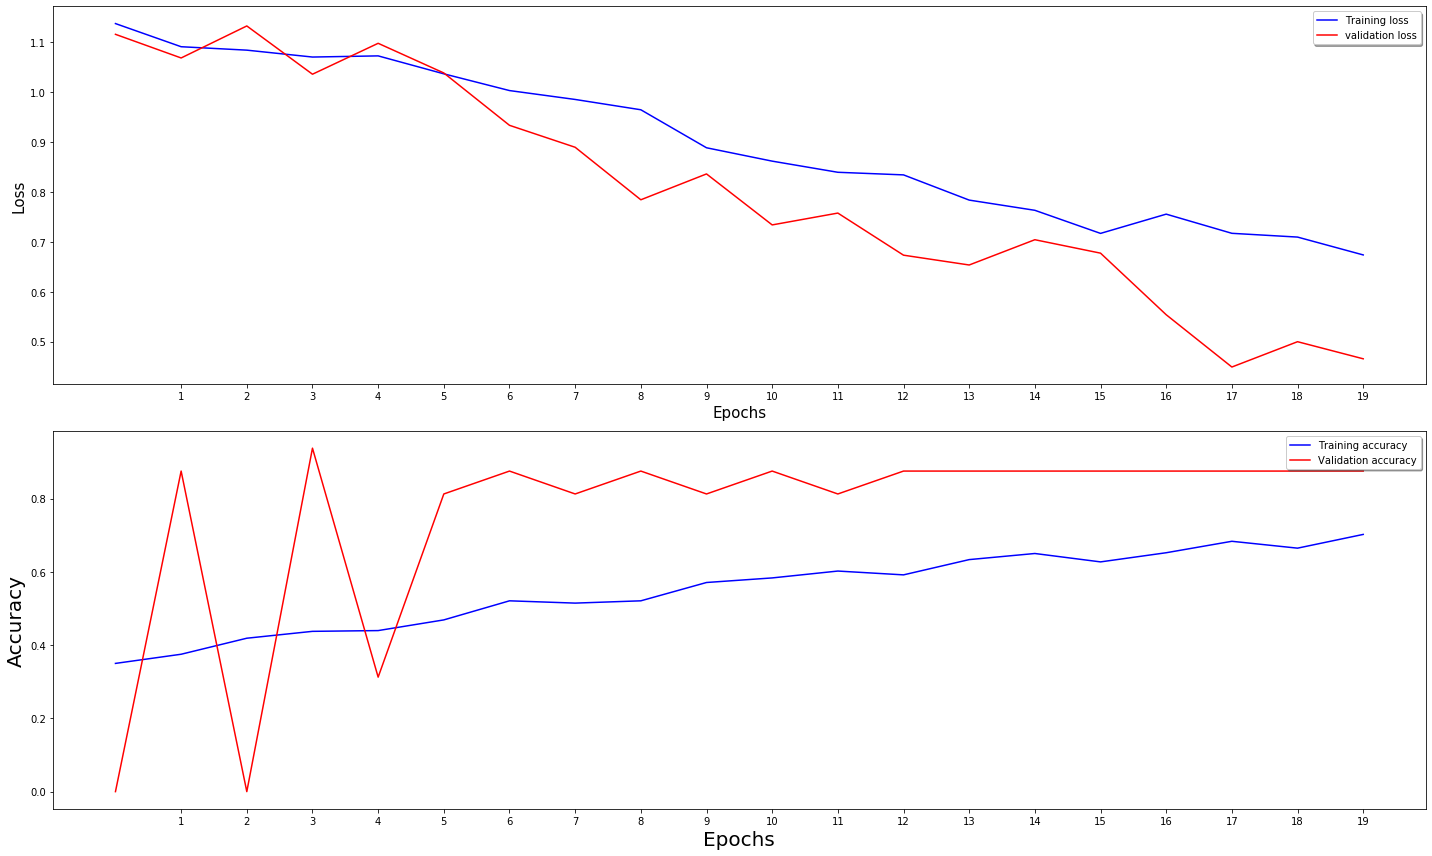

4/4 [==============================] - 0s 39ms/step - loss: 0.6453 - accuracy: 0.7500
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.3375
Epoch 00001: val_loss improved from inf to 1.12892, saving model to ./sgdnag2.h5
30/30 [==============================] - 8s 260ms/step - loss: 1.1063 - accuracy: 0.3375 - val_loss: 1.1289 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0659 - accuracy: 0.4104
Epoch 00002: val_loss did not improve from 1.12892
30/30 [==============================] - 8s 252ms/step - loss: 1.0659 - accuracy: 0.4104 - val_loss: 1.1342 - val_accuracy: 0.4375 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0520 - accuracy: 0.4521
Epoch 00003: val_loss improved from 1.12892 to 0.87449, saving model to ./sgdnag2.h5
30/30 [====================

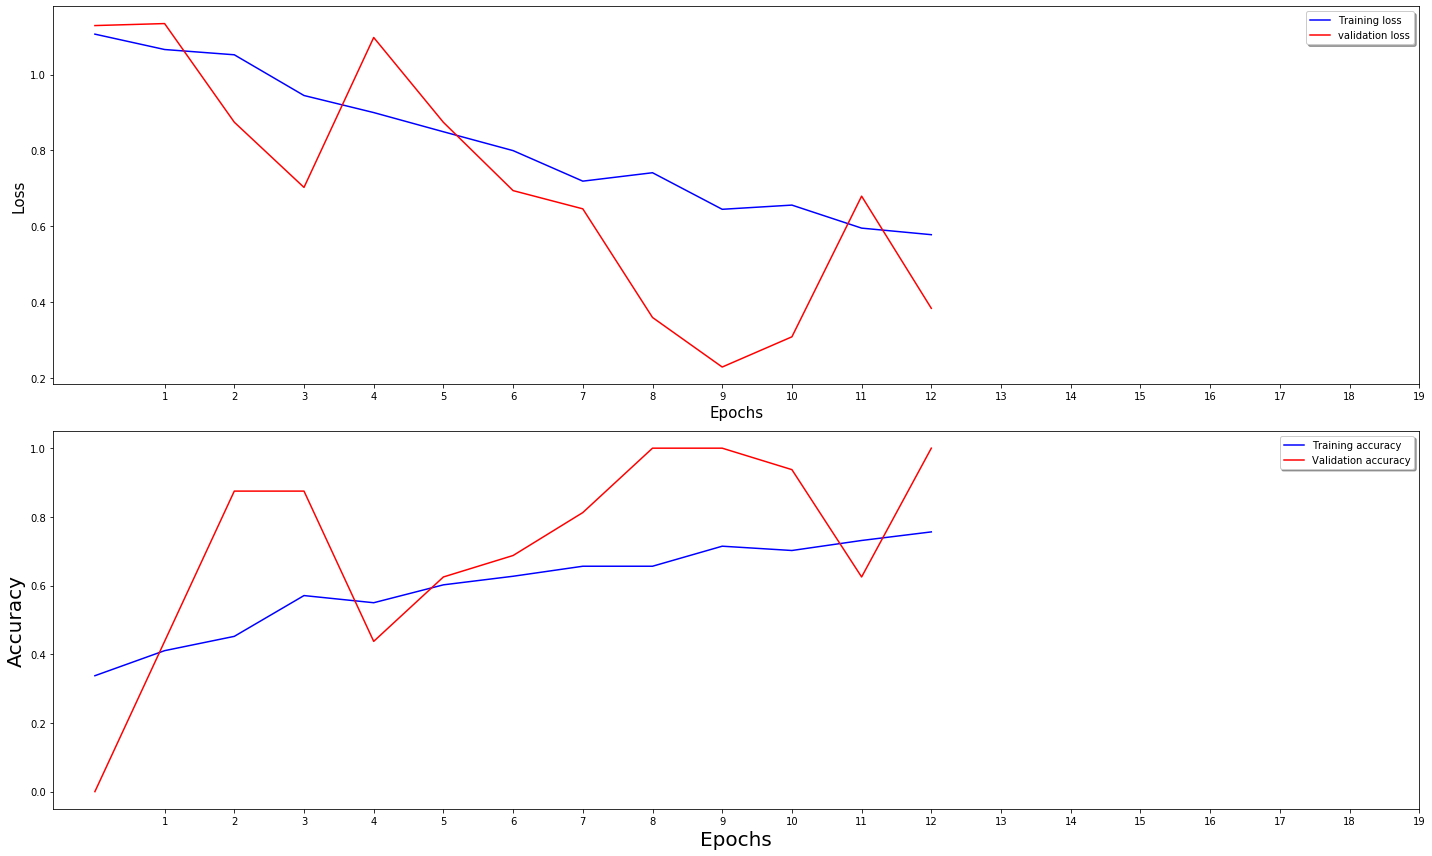

4/4 [==============================] - 0s 40ms/step - loss: 0.5995 - accuracy: 0.7333
***********************************************************************************************


In [18]:
evaluate_nag=[]
for i,lr in enumerate(learn_rate):
    
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(learning_rate=lr,momentum=0.9,nesterov=True),
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./sgdnag{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
    # we put our call backs into a callback list
        
    callbacks = [earlystop, checkpoint, reduce_lr]

  
    #Training the model 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    # Visualizing  Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1),)
    ax1.set_xlabel('Epochs' ,fontsize=15)
    ax1.set_ylabel('Loss' ,fontsize=15)
    ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xlabel('Epochs' ,fontsize=20)
    ax2.set_ylabel('Accuracy' ,fontsize=20)
    ax2.set_xticks(np.arange(1, epoch, 1))

    ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

    #Evaluating the model performance
    Eval_nag=model.evaluate(validation_generator)
    evaluate_nag.append(Eval_nag)
    print("***********************************************************************************************")





In [19]:
# Displaying the value of Accuracy and Loss for different Learning Rate for (SGD+Momentum+Nestrov) optimizer.
df=pd.DataFrame({"Loss & Accuracy":evaluate_nag,"learning rate":learn_rate})
df

,Loss & Accuracy,learning rate
0,"[1.1496444940567017, 0.3333333432674408]",0.100
1,"[0.6452900171279907, 0.75]",0.001
2,"[0.5994800329208374, 0.7333333492279053]",0.010


In [20]:
# Saving the best model which will be used in next step for prediction.
saved_model2=load_model("sgdnag2.h5")
metric=pd.DataFrame(history.history)
metric

,loss,accuracy,val_loss,val_accuracy,lr
0,1.106347,0.337500,1.128917,0.0000,0.01
1,1.065865,0.410417,1.134169,0.4375,0.01
2,1.051986,0.452083,0.874494,0.8750,0.01
3,0.944753,0.570833,0.702790,0.8750,0.01
4,0.899836,0.550000,1.097539,0.4375,0.01
5,0.849323,0.602083,0.874150,0.6250,0.01
6,0.799634,0.627083,0.694326,0.6875,0.01
7,0.719251,0.656250,0.646334,0.8125,0.01
8,0.741423,0.656250,0.360317,1.0000,0.01
9,0.645143,0.714583,0.229826,1.0000,0.01


# Predicting the Images using best model saved for (SGD+Momentum+ Nestrov) optimizer


In [21]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model2.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Saree")
        elif final==1:
            Predicted_class.append("Shirt")
        elif final==2:
            Predicted_class.append("Tshirt")
        
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res


,Predicted_Label,Actual_Label
0,Saree,Saree
1,Saree,Saree
2,Saree,Saree
3,Saree,Saree
4,Saree,Saree
5,Saree,Saree
6,Saree,Saree
7,Saree,Saree
8,Saree,Saree
9,Saree,Saree


## Confusion matrix Visualization for (SGD+Momentum+Nesterov Accelerated Gradient Descent) optimizer.

(3.0, 0.0)

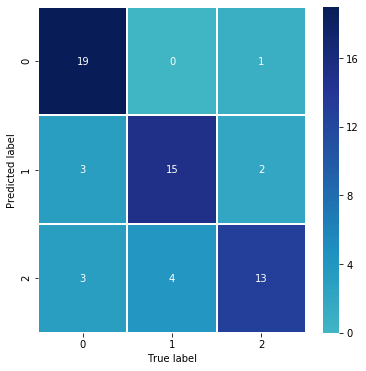

In [22]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Training model using Rmsprop optimizer

Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 19260322.0000 - accuracy: 0.3104
Epoch 00001: val_loss improved from inf to 1.72460, saving model to ./rmsprop0.h5
30/30 [==============================] - 8s 257ms/step - loss: 19260322.0000 - accuracy: 0.3104 - val_loss: 1.7246 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.3304 - accuracy: 0.3562
Epoch 00002: val_loss improved from 1.72460 to 0.94080, saving model to ./rmsprop0.h5
30/30 [==============================] - 8s 254ms/step - loss: 1.3304 - accuracy: 0.3562 - val_loss: 0.9408 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1272 - accuracy: 0.3229
Epoch 00003: val_loss improved from 0.94080 to 0.92277, saving model to ./rmsprop0.h5
30/30 [==============================] - 8s 280ms/step - loss: 1.1272 - accuracy: 0.3229 - val_loss: 0.9228 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
30/

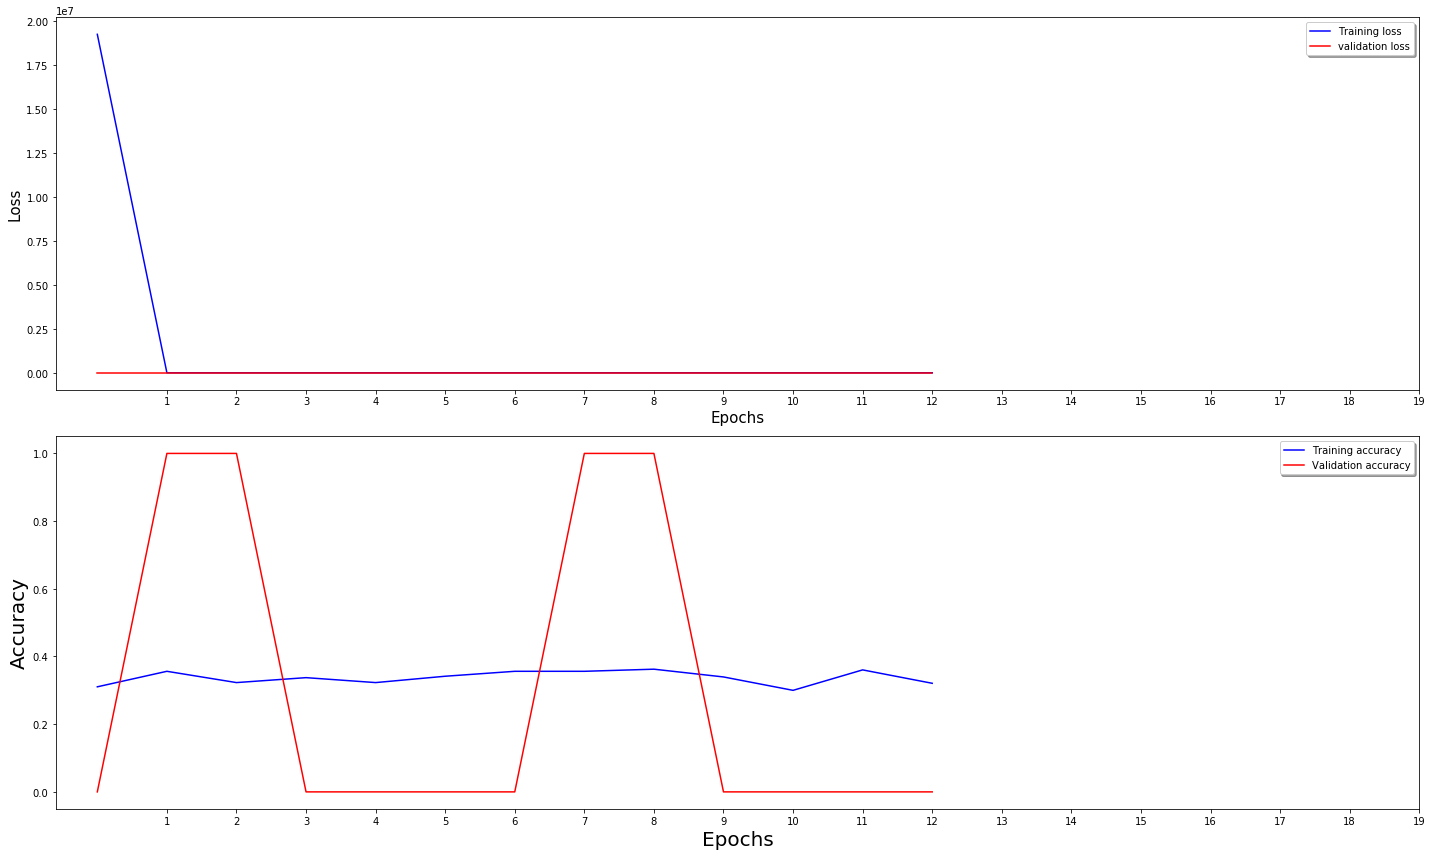

4/4 [==============================] - 0s 39ms/step - loss: 1.1101 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.3242 - accuracy: 0.3292
Epoch 00001: val_loss improved from inf to 1.11616, saving model to ./rmsprop1.h5
30/30 [==============================] - 8s 259ms/step - loss: 1.3242 - accuracy: 0.3292 - val_loss: 1.1162 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0694 - accuracy: 0.4792
Epoch 00002: val_loss improved from 1.11616 to 0.46797, saving model to ./rmsprop1.h5
30/30 [==============================] - 8s 260ms/step - loss: 1.0694 - accuracy: 0.4792 - val_loss: 0.4680 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0298 - accuracy: 0.5063
Epoch 00003: val_loss did not improve from 0.46797
30/30 [==================

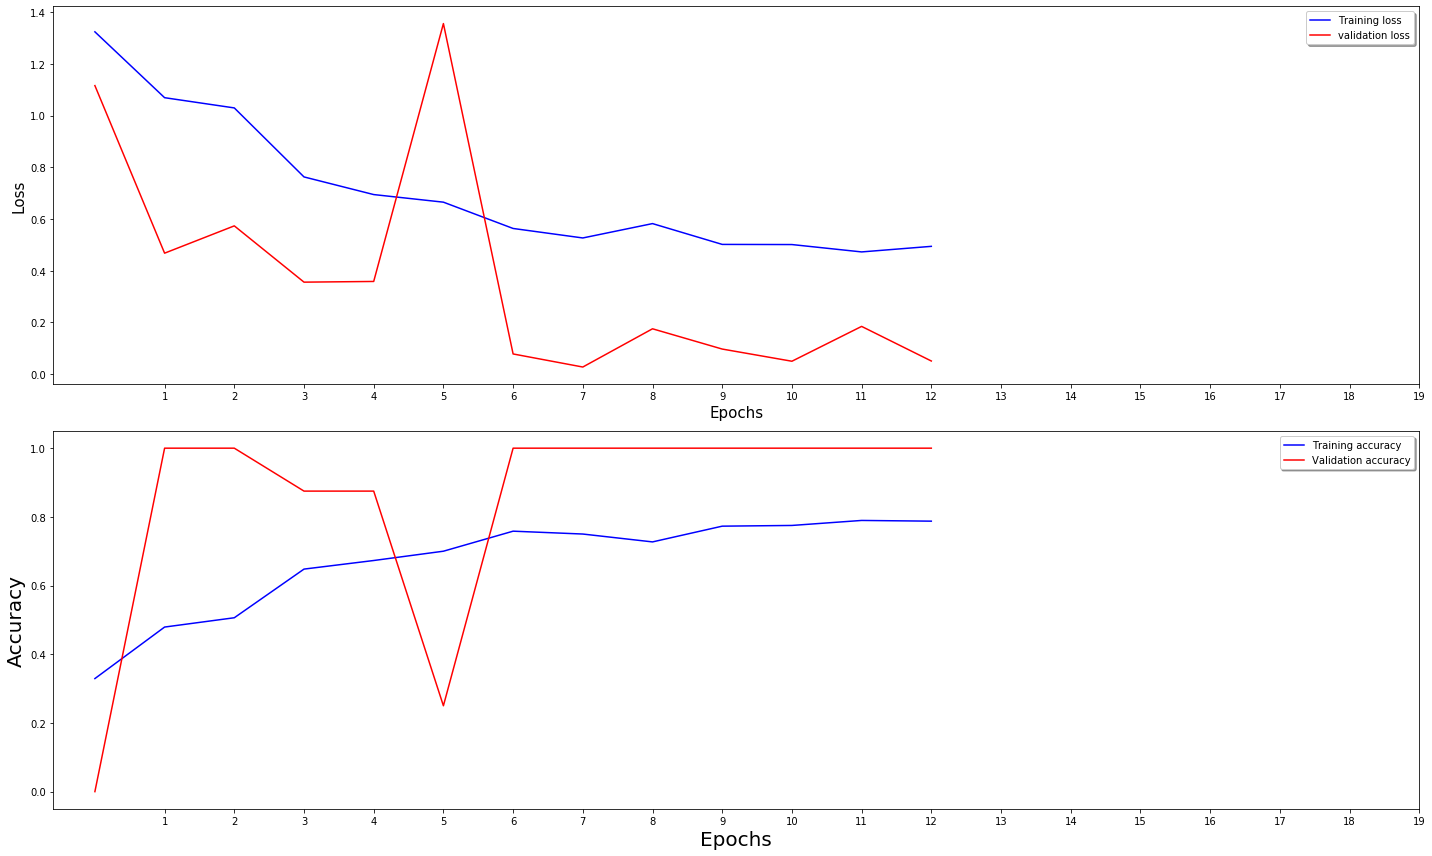

4/4 [==============================] - 0s 38ms/step - loss: 0.5228 - accuracy: 0.7500
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 130.7804 - accuracy: 0.3313
Epoch 00001: val_loss improved from inf to 1.03288, saving model to ./rmsprop2.h5
30/30 [==============================] - 8s 260ms/step - loss: 130.7804 - accuracy: 0.3313 - val_loss: 1.0329 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1063 - accuracy: 0.3229
Epoch 00002: val_loss did not improve from 1.03288
30/30 [==============================] - 8s 253ms/step - loss: 1.1063 - accuracy: 0.3229 - val_loss: 1.1055 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.2061 - accuracy: 0.3417
Epoch 00003: val_loss did not improve from 1.03288
30/30 [==============================] - 8s 254ms/step -

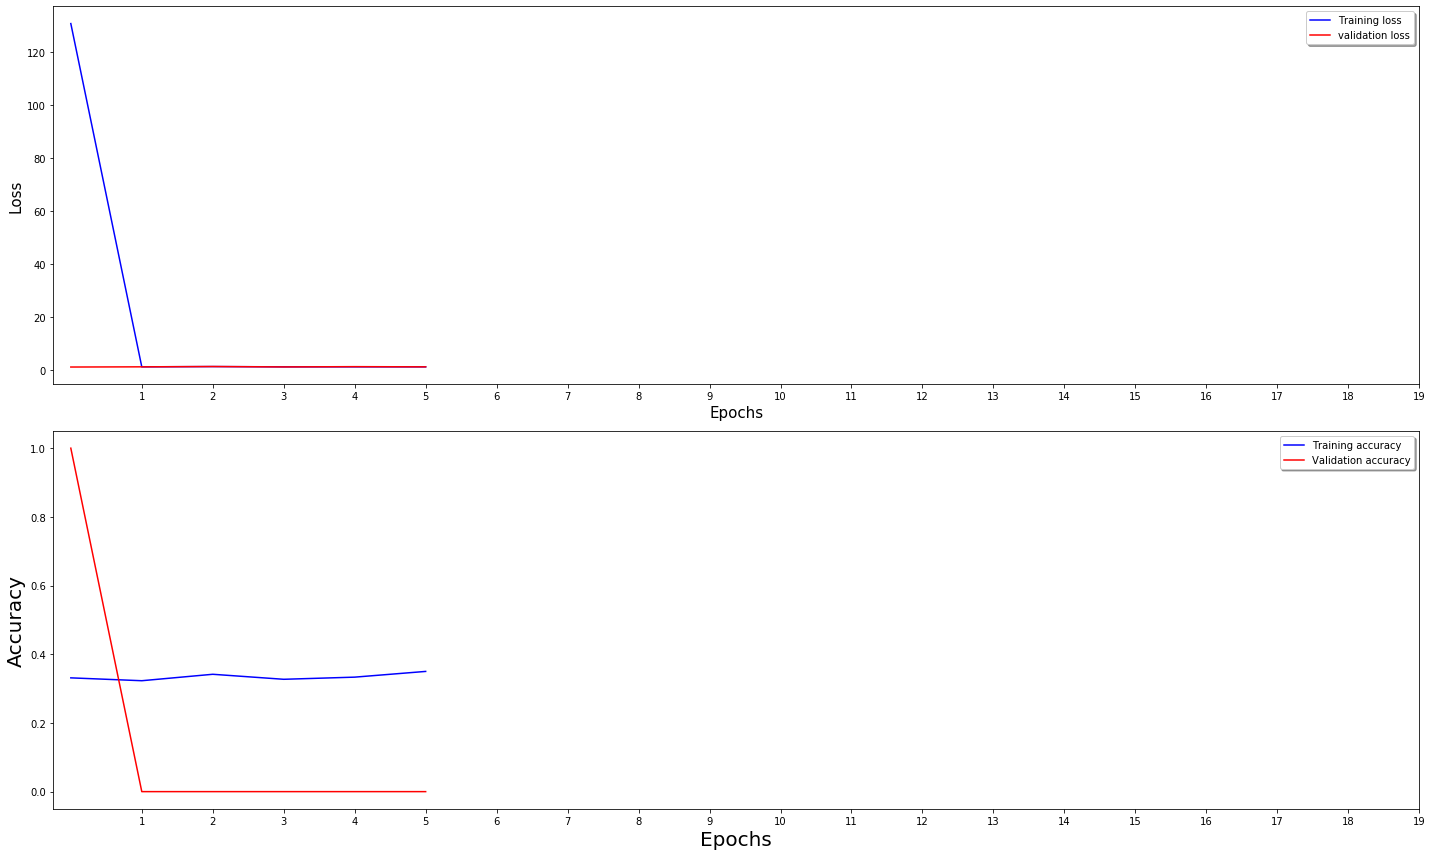

4/4 [==============================] - 0s 42ms/step - loss: 1.0998 - accuracy: 0.3333
***********************************************************************************************


In [25]:
evaluate_rms=[]
for i,lr in enumerate(learn_rate):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer = RMSprop(lr = lr,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False),
                  metrics=['accuracy'])

    ## EarlyStopping and ModelCheckpoint

    checkpoint = ModelCheckpoint("./rmsprop{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
    # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]


    
    #Training the model 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    # Visualizing  Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1),)
    ax1.set_xlabel('Epochs' ,fontsize=15)
    ax1.set_ylabel('Loss' ,fontsize=15)
    ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xlabel('Epochs' ,fontsize=20)
    ax2.set_ylabel('Accuracy' ,fontsize=20)
    ax2.set_xticks(np.arange(1, epoch, 1))

    ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()
    # Evaluating model performance
    Eval_rms=model.evaluate(validation_generator)
    evaluate_rms.append(Eval_rms)
    print("***********************************************************************************************")




In [26]:
# Displaying the value of Accuracy and Loss for different Learning Rate for (SGD+Momentum+Nestrov) optimizer.
df=pd.DataFrame({"Loss & Accuracy":evaluate_rms,"learning rate":learn_rate})
df

,Loss & Accuracy,learning rate
0,"[1.1101477146148682, 0.3333333432674408]",0.100
1,"[0.5228344202041626, 0.75]",0.001
2,"[1.099818468093872, 0.3333333432674408]",0.010


In [27]:
# Saving the best model which will be used in next step for prediction
saved_model3=load_model("rmsprop1.h5")


## Predicting the Images using best model saved for Rmsprop optimizer

In [28]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model3.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Saree")
        elif final==1:
            Predicted_class.append("Shirt")
        elif final==2:
            Predicted_class.append("Tshirt")
        
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res


,Predicted_Label,Actual_Label
0,Saree,Saree
1,Saree,Saree
2,Saree,Saree
3,Saree,Saree
4,Saree,Saree
5,Saree,Saree
6,Saree,Saree
7,Saree,Saree
8,Saree,Saree
9,Saree,Saree


## Confusion matrix Visualization for Rmsprop optimizer.

(3.0, 0.0)

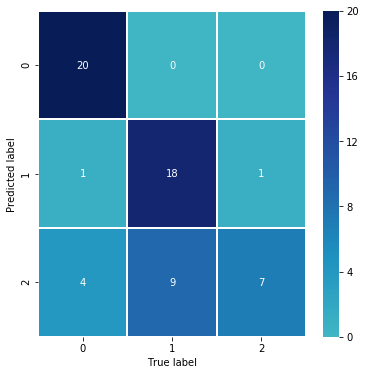

In [29]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Training model using Adam optimizer


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 8624.0928 - accuracy: 0.3417
Epoch 00001: val_loss improved from inf to 1.00512, saving model to ./adam0.h5
30/30 [==============================] - 8s 272ms/step - loss: 8624.0928 - accuracy: 0.3417 - val_loss: 1.0051 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1790 - accuracy: 0.3125
Epoch 00002: val_loss did not improve from 1.00512
30/30 [==============================] - 8s 250ms/step - loss: 1.1790 - accuracy: 0.3125 - val_loss: 1.1850 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1132 - accuracy: 0.3021
Epoch 00003: val_loss did not improve from 1.00512
30/30 [==============================] - 7s 244ms/step - loss: 1.1132 - accuracy: 0.3021 - val_loss: 1.2250 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 0s - loss: 1.1142 - accuracy: 

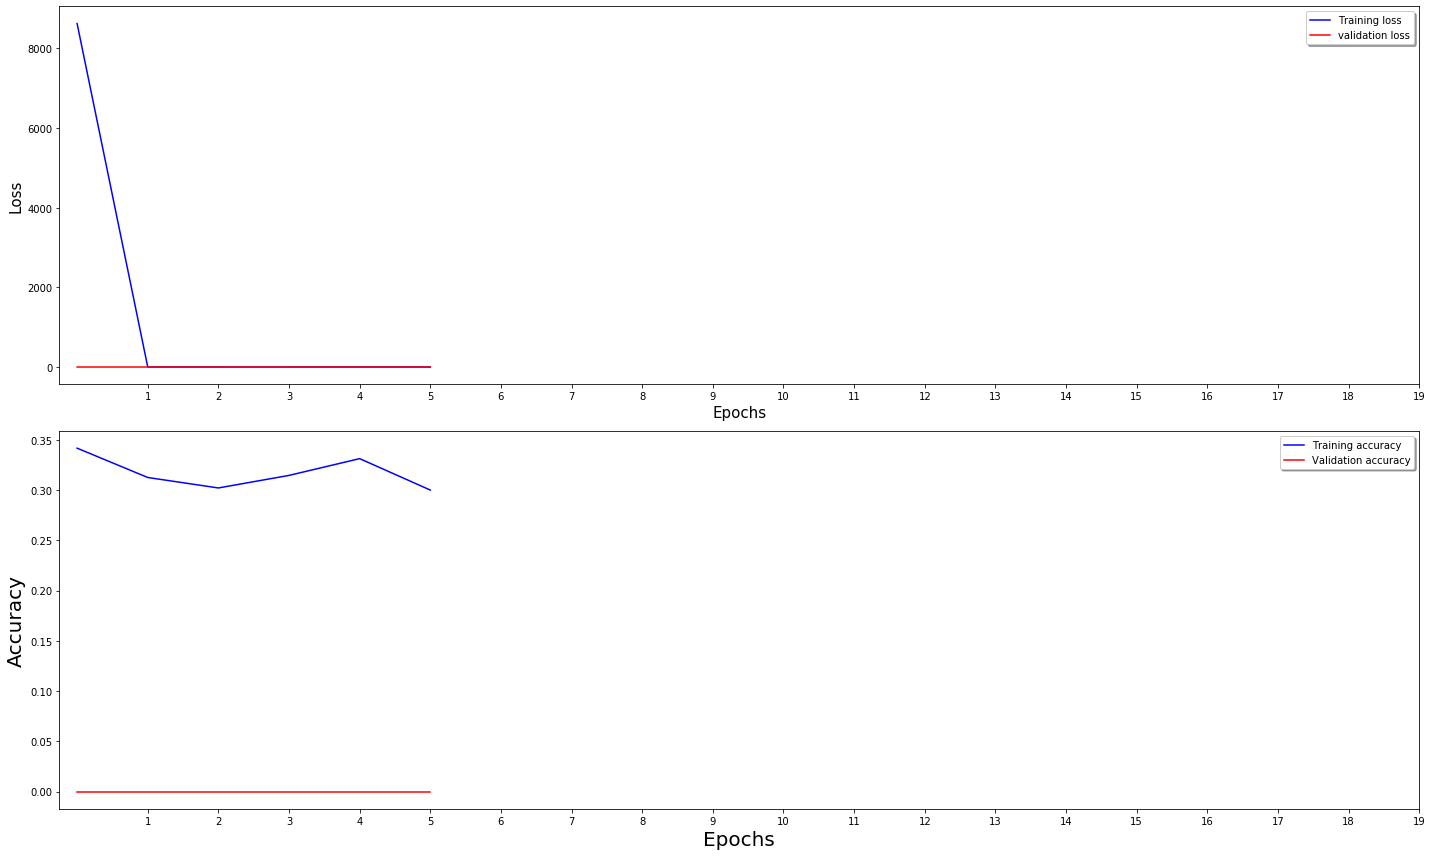

4/4 [==============================] - 0s 38ms/step - loss: 1.1592 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1583 - accuracy: 0.3354
Epoch 00001: val_loss improved from inf to 1.11177, saving model to ./adam1.h5
30/30 [==============================] - 8s 256ms/step - loss: 1.1583 - accuracy: 0.3354 - val_loss: 1.1118 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.3917
Epoch 00002: val_loss did not improve from 1.11177
30/30 [==============================] - 7s 249ms/step - loss: 1.0925 - accuracy: 0.3917 - val_loss: 1.1450 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.4146
Epoch 00003: val_loss improved from 1.11177 to 1.06697, saving model to ./adam1.h5
30/30 [====================

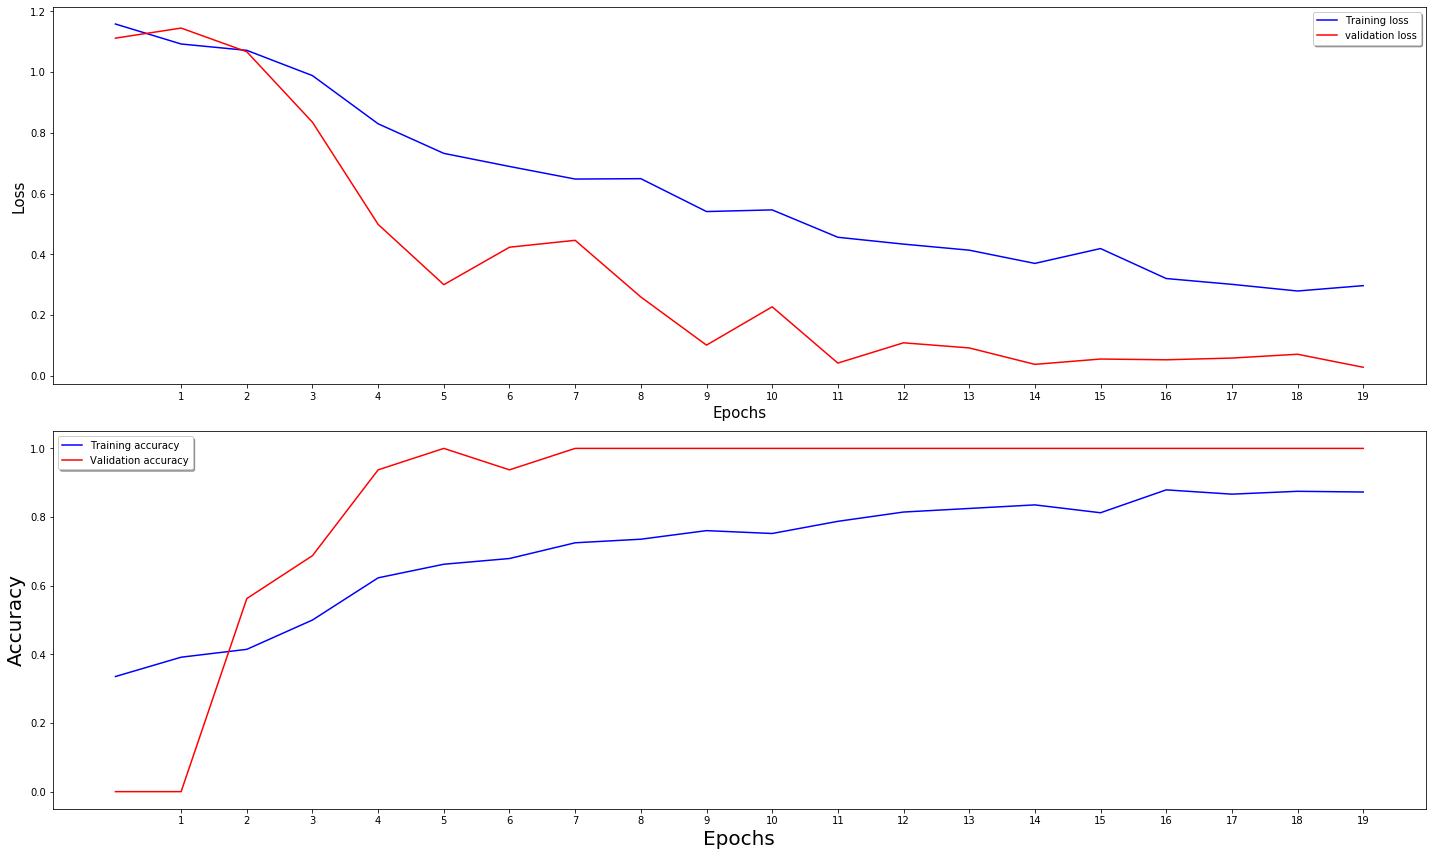

4/4 [==============================] - 0s 38ms/step - loss: 0.3515 - accuracy: 0.8500
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 3.9003 - accuracy: 0.3313
Epoch 00001: val_loss improved from inf to 1.01522, saving model to ./adam2.h5
30/30 [==============================] - 8s 254ms/step - loss: 3.9003 - accuracy: 0.3313 - val_loss: 1.0152 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1060 - accuracy: 0.3250
Epoch 00002: val_loss did not improve from 1.01522
30/30 [==============================] - 8s 252ms/step - loss: 1.1060 - accuracy: 0.3250 - val_loss: 1.0728 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1004 - accuracy: 0.3333
Epoch 00003: val_loss did not improve from 1.01522
30/30 [==============================] - 8s 260ms/step - loss: 

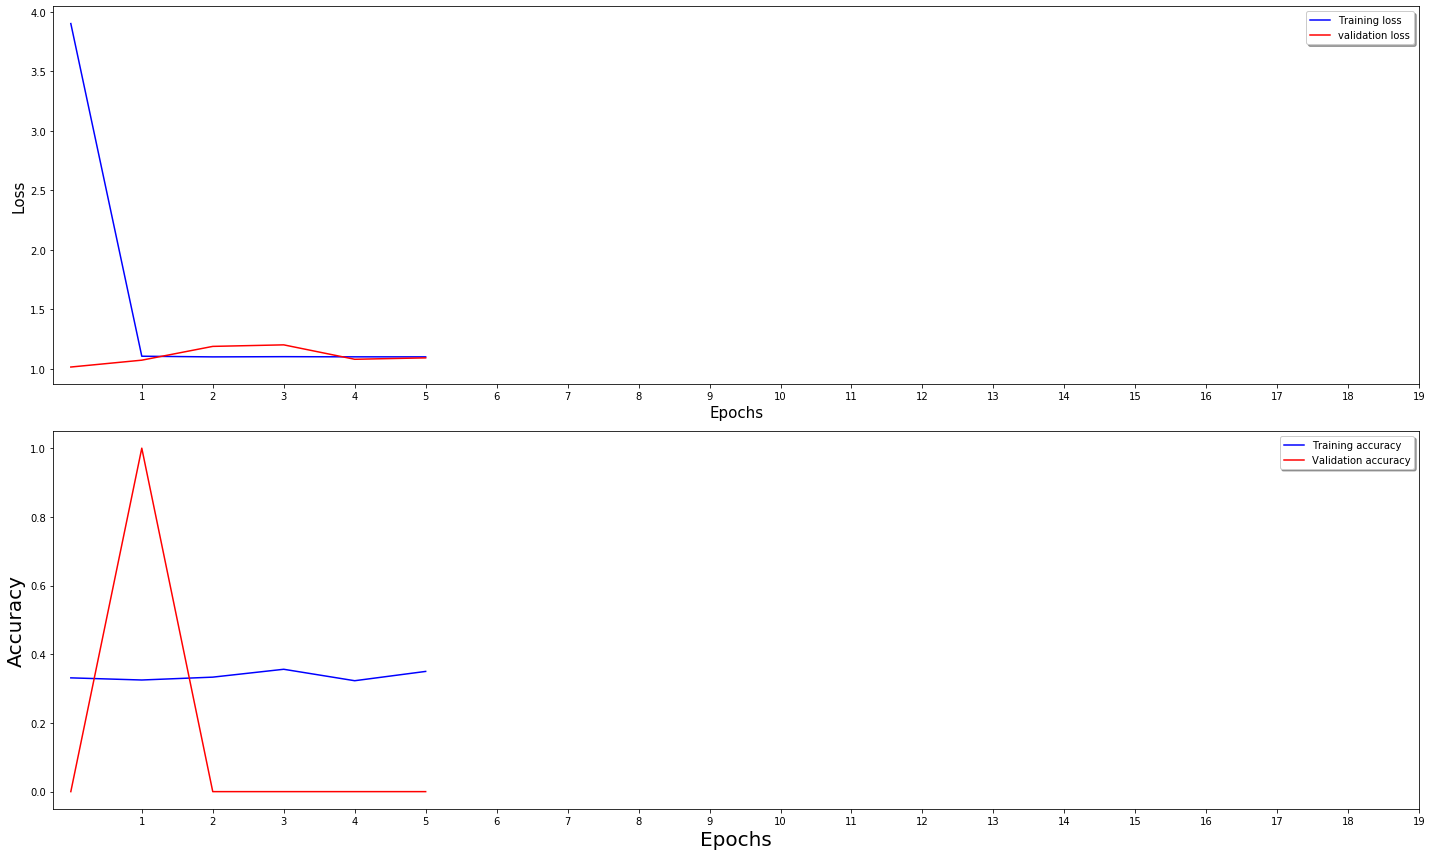

4/4 [==============================] - 0s 39ms/step - loss: 1.1133 - accuracy: 0.3333
***********************************************************************************************


In [30]:
evaluate_adam=[]
for i,lr in enumerate(learn_rate):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=lr,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=True),
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./adam{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
    # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
    #Training the model
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    # Visualizing  Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1),)
    ax1.set_xlabel('Epochs' ,fontsize=15)
    ax1.set_ylabel('Loss' ,fontsize=15)
    ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xlabel('Epochs' ,fontsize=20)
    ax2.set_ylabel('Accuracy' ,fontsize=20)
    ax2.set_xticks(np.arange(1, epoch, 1))

    ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

    #Evaluating Model performance
    Eval_adam=model.evaluate(validation_generator)
    evaluate_adam.append(Eval_adam)
    print("***********************************************************************************************")

In [31]:
# Displaying the value of Accuracy and Loss for different Learning Rate for (SGD+Momentum) optimizer.
df=pd.DataFrame({"Loss & Accuracy":evaluate_adam,"learning rate":learn_rate})
df

,Loss & Accuracy,learning rate
0,"[1.159193754196167, 0.3333333432674408]",0.100
1,"[0.35148030519485474, 0.8500000238418579]",0.001
2,"[1.1132525205612183, 0.3333333432674408]",0.010


In [32]:
# Saving the best model which will be used in next step for prediction
saved_model4=load_model("adam1.h5")


## Predicting the Images using best model saved for Adam optimizer

In [33]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        #print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model4.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Saree")
        elif final==1:
            Predicted_class.append("Shirt")
        elif final==2:
            Predicted_class.append("Tshirt")
        
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res


,Predicted_Label,Actual_Label
0,Saree,Saree
1,Saree,Saree
2,Saree,Saree
3,Saree,Saree
4,Saree,Saree
5,Saree,Saree
6,Saree,Saree
7,Saree,Saree
8,Saree,Saree
9,Saree,Saree


## Confusion matrix Visualization for  Adam optimizer.

(3.0, 0.0)

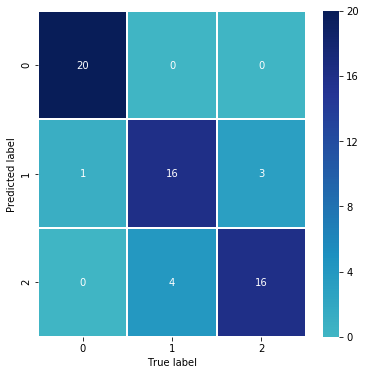

In [34]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Training model using Nadam optimizer


Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 9530.1836 - accuracy: 0.3375
Epoch 00001: val_loss improved from inf to 1.14073, saving model to ./nadam0.h5
30/30 [==============================] - 8s 283ms/step - loss: 9530.1836 - accuracy: 0.3375 - val_loss: 1.1407 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.1438 - accuracy: 0.2771
Epoch 00002: val_loss did not improve from 1.14073
30/30 [==============================] - 8s 268ms/step - loss: 1.1438 - accuracy: 0.2771 - val_loss: 1.1502 - val_accuracy: 0.0000e+00 - lr: 0.1000
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.1074 - accuracy: 0.3229
Epoch 00003: val_loss improved from 1.14073 to 0.95624, saving model to ./nadam0.h5
30/30 [==============================] - 8s 263ms/step - loss: 1.1074 - accuracy: 0.3229 - val_loss: 0.9562 - val_accuracy: 1.0000 - lr: 0.1000
Epoch 4/20
30/30 [==============================] - ETA: 

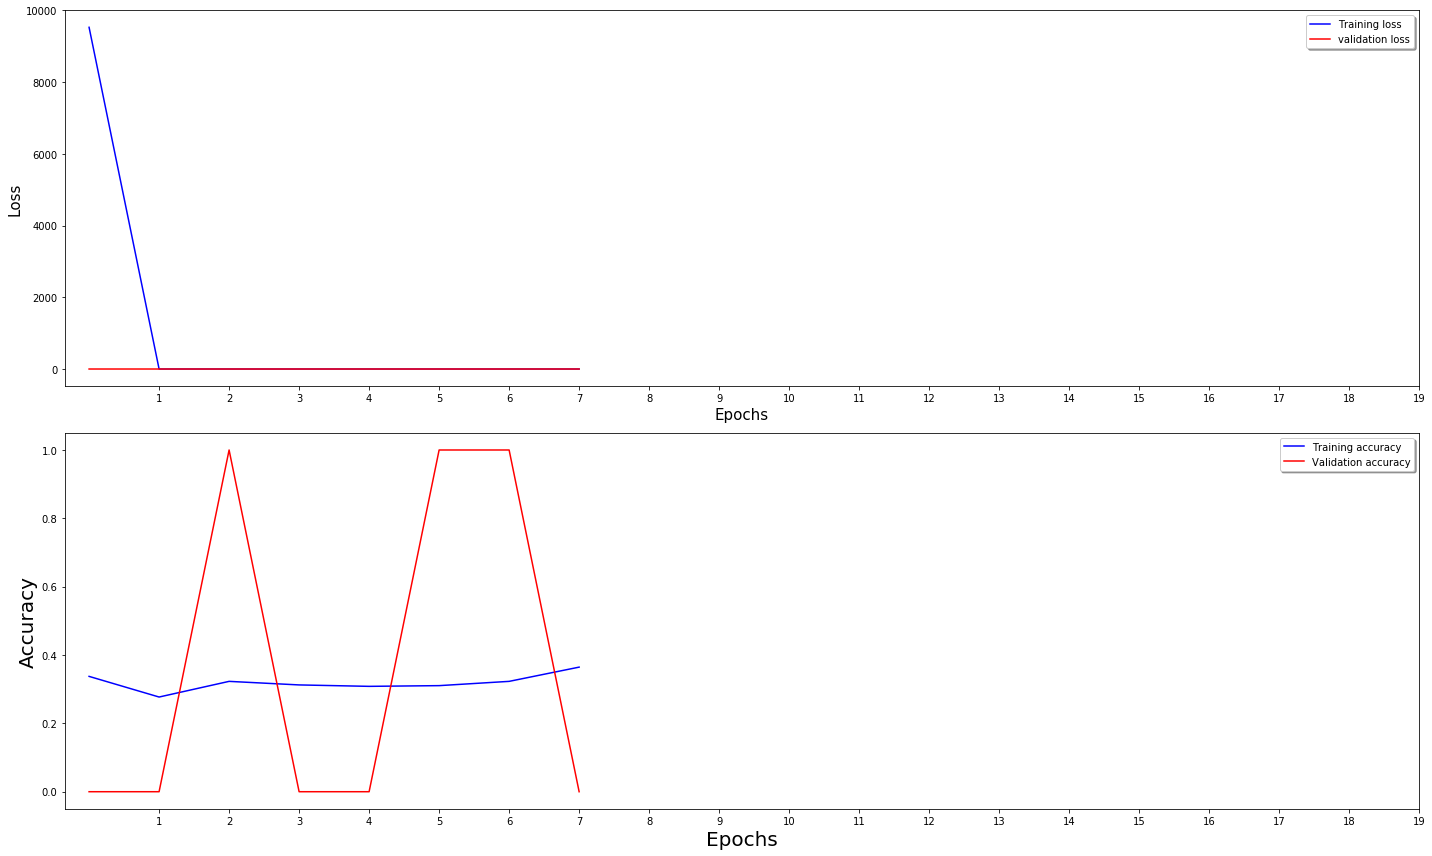

4/4 [==============================] - 0s 43ms/step - loss: 1.1050 - accuracy: 0.3333
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 1.1820 - accuracy: 0.3521
Epoch 00001: val_loss improved from inf to 1.04587, saving model to ./nadam1.h5
30/30 [==============================] - 9s 292ms/step - loss: 1.1820 - accuracy: 0.3521 - val_loss: 1.0459 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0490 - accuracy: 0.4646
Epoch 00002: val_loss improved from 1.04587 to 0.72288, saving model to ./nadam1.h5
30/30 [==============================] - 8s 274ms/step - loss: 1.0490 - accuracy: 0.4646 - val_loss: 0.7229 - val_accuracy: 0.8750 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 0.8718 - accuracy: 0.5625
Epoch 00003: val_loss improved from 0.72288 to 0.55186, saving model to ./nadam1.h5


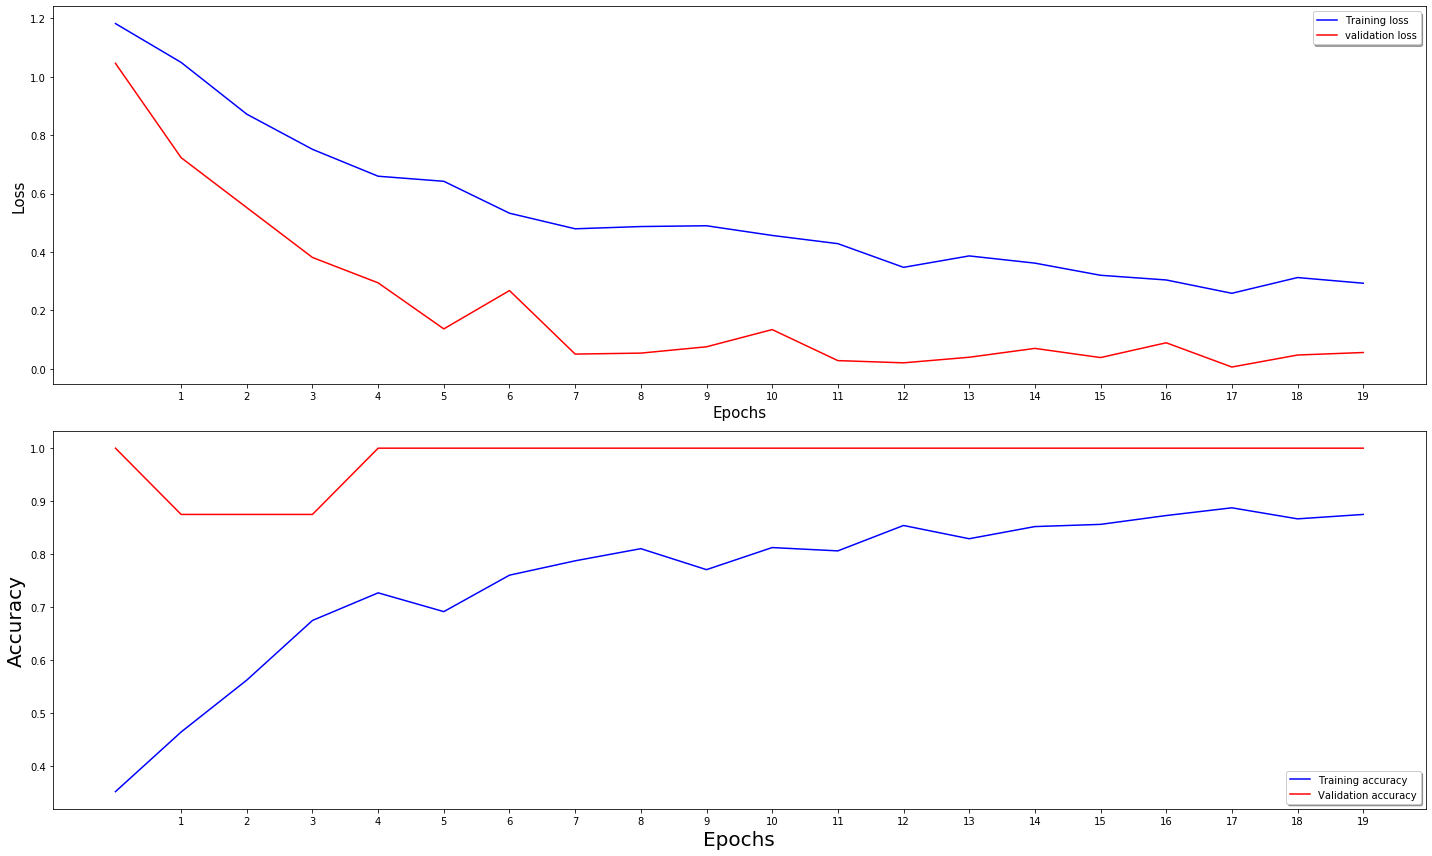

4/4 [==============================] - 0s 40ms/step - loss: 0.3912 - accuracy: 0.8000
***********************************************************************************************
Epoch 1/20
30/30 [==============================] - ETA: 0s - loss: 2.3415 - accuracy: 0.3167
Epoch 00001: val_loss improved from inf to 1.09478, saving model to ./nadam2.h5
30/30 [==============================] - 9s 286ms/step - loss: 2.3415 - accuracy: 0.3167 - val_loss: 1.0948 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/20
30/30 [==============================] - ETA: 0s - loss: 1.0983 - accuracy: 0.3500
Epoch 00002: val_loss improved from 1.09478 to 1.07919, saving model to ./nadam2.h5
30/30 [==============================] - 8s 283ms/step - loss: 1.0983 - accuracy: 0.3500 - val_loss: 1.0792 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 3/20
30/30 [==============================] - ETA: 0s - loss: 1.0999 - accuracy: 0.3250
Epoch 00003: val_loss did not improve from 1.07919
30/30 [==================

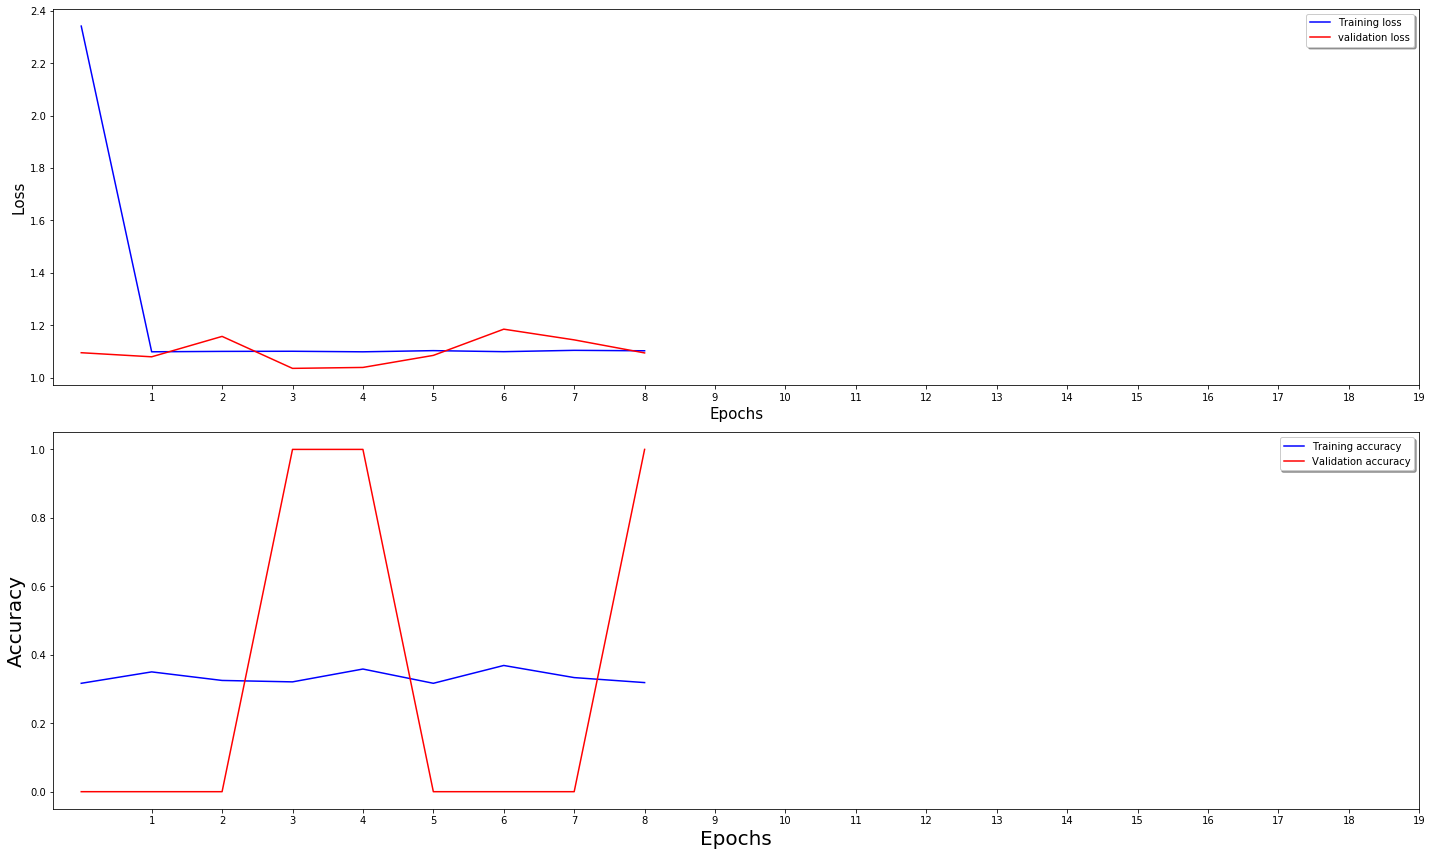

4/4 [==============================] - 0s 38ms/step - loss: 1.1012 - accuracy: 0.3333
***********************************************************************************************


In [35]:
evaluate_Nadam=[]
for i,lr in enumerate(learn_rate):
    model=Sequential()

    # First convolution layer
    model.add(Conv2D(32,(3,3),input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Second convolution layer
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Third convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    # Fourth convolution layer
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Nadam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07, ),
                  metrics=['accuracy'])

    checkpoint = ModelCheckpoint("./nadam{0}.h5".format(i),
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

    earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          restore_best_weights = True)

    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)
    # we put our call backs into a callback list
    callbacks = [earlystop, checkpoint, reduce_lr]

  
    #Training the model 
    history = model.fit_generator(
             train_generator, 
             epochs=epoch,
             validation_data=validation_generator,
             validation_steps=nb_validation_samples//batch_size,
             steps_per_epoch=nb_train_samples//batch_size,
             callbacks=callbacks
  
        )
    
    # Visualizing  Training
    import matplotlib.pyplot as plt
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12))
    ax1.plot(history.history['loss'], color='b', label="Training loss")
    ax1.plot(history.history['val_loss'], color='r', label="validation loss")
    ax1.set_xticks(np.arange(1, epoch, 1),)
    ax1.set_xlabel('Epochs' ,fontsize=15)
    ax1.set_ylabel('Loss' ,fontsize=15)
    ax1.legend(loc='best', shadow=True)

    ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax2.set_xlabel('Epochs' ,fontsize=20)
    ax2.set_ylabel('Accuracy' ,fontsize=20)
    ax2.set_xticks(np.arange(1, epoch, 1))

    ax2.legend(loc='best', shadow=True)
    plt.tight_layout()
    plt.show()

    # Evaluating Model performance
    Eval_Nadam=model.evaluate(validation_generator)
    evaluate_Nadam.append(Eval_Nadam)
    print("***********************************************************************************************")

In [36]:
# Displaying the value of Accuracy and Loss for different Learning Rate for (SGD+Momentum) optimizer.
df=pd.DataFrame({"Loss & Accuracy":evaluate_Nadam,"learning rate":learn_rate})
df

,Loss & Accuracy,learning rate
0,"[1.1049596071243286, 0.3333333432674408]",0.100
1,"[0.3912111818790436, 0.800000011920929]",0.001
2,"[1.1011760234832764, 0.3333333432674408]",0.010


In [37]:
# Saving the best model which will be used in next step for prediction
saved_model5=load_model("nadam1.h5")


## Predicting the Images using best model saved for Rmsprop optimizer

In [38]:
# Predicted samples of the test images
test_Saree='./Garments/test/Saree'
test_Shirt='./Garments/test/Shirt'
test_Tshirt='./Garments/test/Tshirt'

test_Dir=[test_Saree,test_Shirt,test_Tshirt,]
Predicted_class=[]
for test_dir in test_Dir:
    for i in listdir(test_dir):
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(150, 150))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model5.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            Predicted_class.append("Saree")
        elif final==1:
            Predicted_class.append("Shirt")
        elif final==2:
            Predicted_class.append("Tshirt")
        
res = pd.DataFrame()
res['Predicted_Label']=Predicted_class
res['Actual_Label']=validation_generator.classes
res["Predicted_Label"] = res["Predicted_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res["Actual_Label"] = res["Actual_Label"].replace({0: 'Saree', 1: 'Shirt',2:'Tshirt'})
res.to_csv('final_OpenCV_Data_Aug.csv', index=False)
res


,Predicted_Label,Actual_Label
0,Saree,Saree
1,Saree,Saree
2,Saree,Saree
3,Saree,Saree
4,Saree,Saree
5,Saree,Saree
6,Saree,Saree
7,Saree,Saree
8,Saree,Saree
9,Saree,Saree


## Confusion matrix Visualization for Nadam optimizer.

(3.0, 0.0)

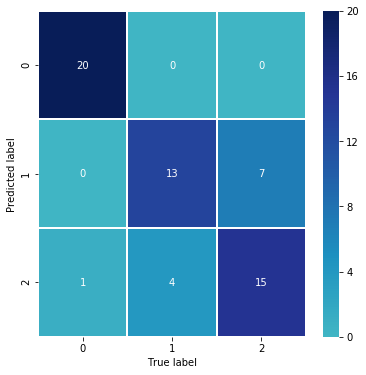

In [39]:
# show the confusion matrix of our predictions
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = res["Predicted_Label"]
y_test = res['Actual_Label']
#class_names = validation_generator.class_indices.keys()

fig, ax =plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True,
            linewidths=1,
            center=0,
            cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Now Displaying the Loss and Accuracy values for each optimezer 

In [40]:
df_best=pd.DataFrame({'Learning Rate':learn_rate,"Loss & Accuracy of sgd":evaluate_sgd,"Loss & Accuracy nag ":evaluate_nag,"Loss & Accuracy rmsprop":evaluate_rms,"Loss & Accuracy adam":evaluate_adam,"Loss & Accuracy nadam":evaluate_Nadam})
df_best

,Learning Rate,Loss & Accuracy of sgd,Loss & Accuracy nag,Loss & Accuracy rmsprop,Loss & Accuracy adam,Loss & Accuracy nadam
0,0.100,"[1.1133685111999512, 0.3333333432674408]","[1.1496444940567017, 0.3333333432674408]","[1.1101477146148682, 0.3333333432674408]","[1.159193754196167, 0.3333333432674408]","[1.1049596071243286, 0.3333333432674408]"
1,0.001,"[1.0898171663284302, 0.3499999940395355]","[0.6452900171279907, 0.75]","[0.5228344202041626, 0.75]","[0.35148030519485474, 0.8500000238418579]","[0.3912111818790436, 0.800000011920929]"
2,0.010,"[0.6633028388023376, 0.6666666865348816]","[0.5994800329208374, 0.7333333492279053]","[1.099818468093872, 0.3333333432674408]","[1.1132525205612183, 0.3333333432674408]","[1.1011760234832764, 0.3333333432674408]"


## For Best Model using adam optimizer at learning rate=0.001

In [45]:
print("Best Model Loss:",evaluate_adam[1][0])
print("Best Model Accuracy:",evaluate_adam[1][1])

Best Model Loss: 0.35148030519485474
Best Model Accuracy: 0.8500000238418579


# Conclusion:
>>1)All the Models are performing best for Learning rate: 0.001              
>>2) Adam is best among the Optimizers: Nadam, SGD+Momentum, Sgd+Momentum+Nestrov,rmsprop       